### Default Payments of Credit Card Clients in Taiwan from 2005 - UCI

##### This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
fraudData = pd.read_csv("/Users/sahilaggarwal/Sahil/MSIM/Projects/Fraud Detection/data2.csv")

In [3]:
fraudData.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


#### This is how the variables are defined. 

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

Y == default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
totalrows = fraudData.count()
print totalrows
print fraudData.shape

ID           30000
LIMIT_BAL    30000
SEX          30000
EDUCATION    30000
MARRIAGE     30000
AGE          30000
PAY_0        30000
PAY_2        30000
PAY_3        30000
PAY_4        30000
PAY_5        30000
PAY_6        30000
BILL_AMT1    30000
BILL_AMT2    30000
BILL_AMT3    30000
BILL_AMT4    30000
BILL_AMT5    30000
BILL_AMT6    30000
PAY_AMT1     30000
PAY_AMT2     30000
PAY_AMT3     30000
PAY_AMT4     30000
PAY_AMT5     30000
PAY_AMT6     30000
y            30000
dtype: int64
(30000, 25)


In [5]:
fraudData.y.value_counts()

0    23364
1     6636
Name: y, dtype: int64

#### The data is highly skewed. One class is represented by 23364 and the other by 6636.

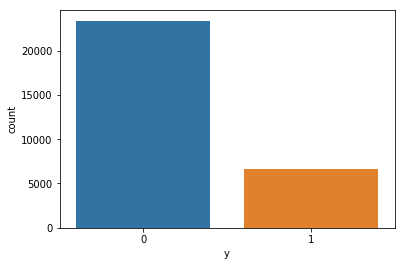

In [6]:
sns.countplot(fraudData.y)

In [7]:
# we do not need ID for classifiers.
df = fraudData.drop("ID",axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# Separating target variable
Y = df['y']
X = df.drop("y",axis=1)
print X.shape, Y.shape
print Y.head()

(30000, 23) (30000,)
0    1
1    1
2    0
3    0
4    0
Name: y, dtype: int64


In [9]:
#Converting strings to numerical for ML algorithms.
X = pd.get_dummies(X, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

In [10]:
print X.shape

(30000, 23)


In [11]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Everything is already in integers. That is why number of coloumns are same.

In [12]:
print X.columns.values

['LIMIT_BAL' 'SEX' 'EDUCATION' 'MARRIAGE' 'AGE' 'PAY_0' 'PAY_2' 'PAY_3'
 'PAY_4' 'PAY_5' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4'
 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3' 'PAY_AMT4'
 'PAY_AMT5' 'PAY_AMT6']


Applying algos to set a baseline.
Splitting Test and Train data.

In [13]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [14]:
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size=0.3, random_state=42)

In [15]:
clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(XTrain , YTrain)
YPredicted = clf.predict(XTest)
print accuracy_score(YTest, YPredicted)*100

81.3333333333


Feature ranking:
1. feature 5 (0.101254)
2. feature 4 (0.065707)
3. feature 0 (0.060589)
4. feature 11 (0.060117)
5. feature 12 (0.053994)
6. feature 13 (0.052090)
7. feature 17 (0.050537)
8. feature 14 (0.050186)
9. feature 16 (0.050052)
10. feature 15 (0.048785)
11. feature 18 (0.047659)
12. feature 22 (0.046245)
13. feature 19 (0.045297)
14. feature 6 (0.043654)
15. feature 20 (0.042944)
16. feature 21 (0.042600)
17. feature 7 (0.025009)
18. feature 8 (0.023827)
19. feature 10 (0.022192)
20. feature 2 (0.021065)
21. feature 9 (0.019647)
22. feature 3 (0.014191)
23. feature 1 (0.012357)


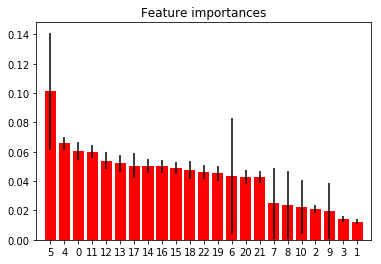

In [16]:
# Calulating feature importance based on Random Tree Classifier.

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### EXPORATORY DATA ANALYSIS

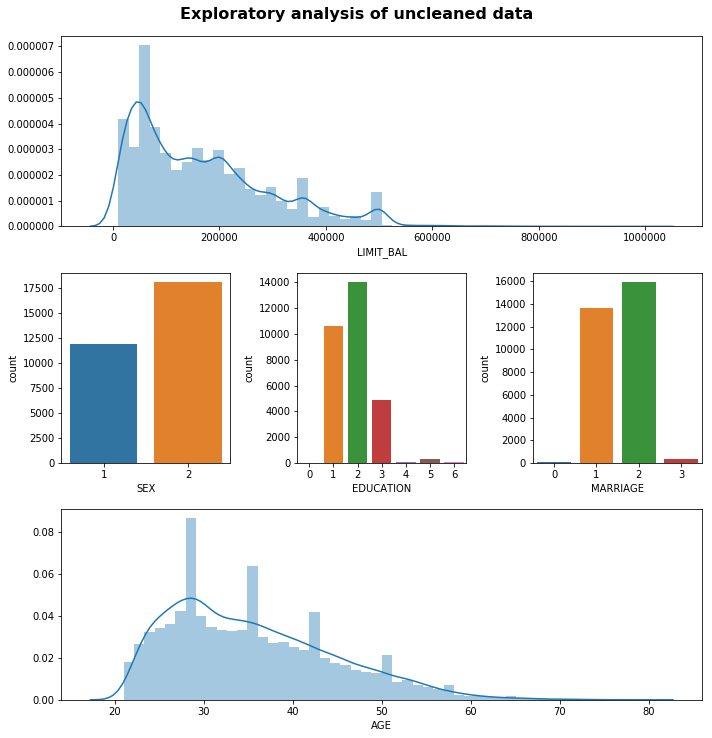

In [17]:

# examine distribution of values
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0),)
ax3 = plt.subplot2grid((3, 3), (1, 1),)
ax4 = plt.subplot2grid((3, 3), (1, 2),)
ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
sns.distplot(df.LIMIT_BAL, ax=ax1);
sns.countplot(df.SEX, ax=ax2)
sns.countplot(df.EDUCATION, ax=ax3)
sns.countplot(df.MARRIAGE, ax=ax4)
sns.distplot(df.AGE, ax=ax5);
plt.tight_layout()
plt.suptitle('Exploratory analysis of uncleaned data',y=1.02,fontsize=16,weight='bold');

Drawing insights from the results, most of the data for credit limit is concentrated till 500000, so dropping values higher than that.
Also for age, cutting of at 70.

In [18]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [19]:
df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Binning age and credit limit variables.

In [20]:
# Benefits ease of analysis and machine learning algorithms
agebins = np.arange(20, 70, 10)
agebinlabels = ['{}s'.format(i, j) for i, j in zip(agebins, agebins[1:])]
df['AGE_GROUP'] = pd.cut(df.AGE, bins=agebins, labels=agebinlabels, right=False)

creditlimitbins = np.arange(0, 500000, 50000)
creditbinlabels = ['{}-{}'.format(i//1000, j//1000) for i, j in zip(creditlimitbins, creditlimitbins[1:])]
df['LIMIT_BAL_GROUP'] = pd.cut(df.LIMIT_BAL, bins=creditlimitbins, labels=creditbinlabels)

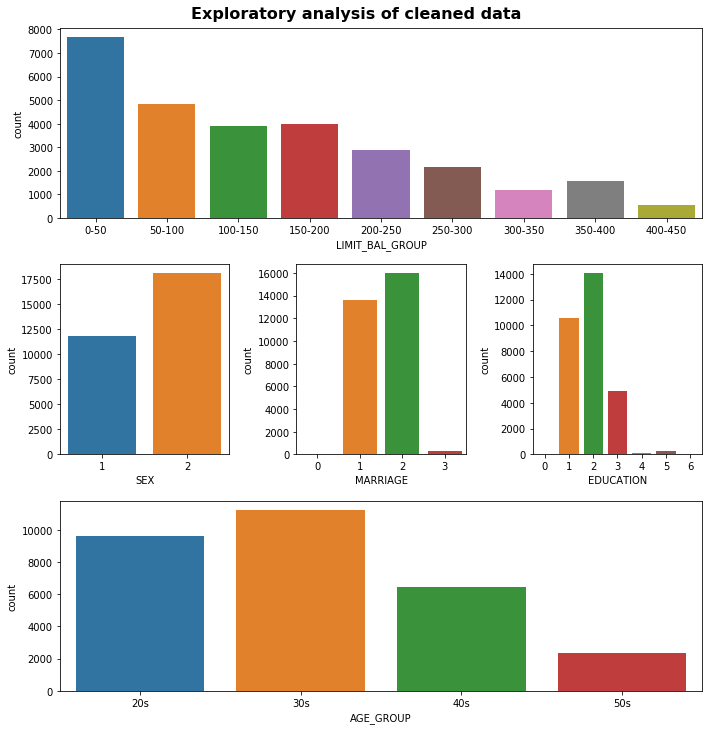

In [21]:
# examine distribution of values following data cleaning
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0),)
ax3 = plt.subplot2grid((3, 3), (1, 1),)
ax4 = plt.subplot2grid((3, 3), (1, 2),)
ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
plotlist = ['LIMIT_BAL_GROUP', 'SEX', 'MARRIAGE', 'EDUCATION', 'AGE_GROUP']
for col, ax in zip(plotlist, fig.get_axes()):
    sns.countplot(x=col, data=df, ax=ax)
plt.suptitle('Exploratory analysis of cleaned data', y=1.01, fontsize=16, weight='bold')
plt.tight_layout()

#### FINDING Correlation with target for every feature 

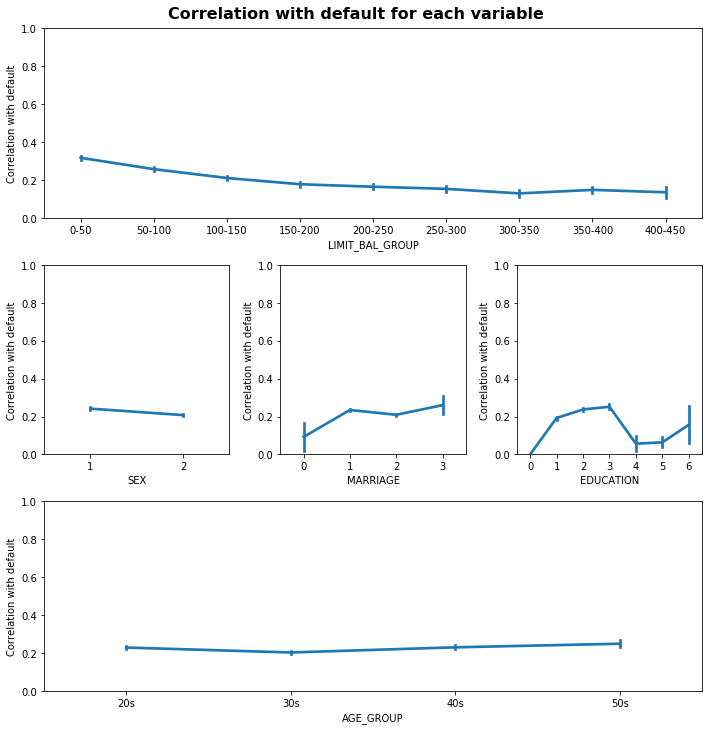

In [22]:
# construct figure from pointplots
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), sharey=ax1)
ax3 = plt.subplot2grid((3, 3), (1, 1), sharey=ax1)
ax4 = plt.subplot2grid((3, 3), (1, 2), sharey=ax1)
ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=3, sharey=ax1)
plotlist = ['LIMIT_BAL_GROUP', 'SEX', 'MARRIAGE', 'EDUCATION', 'AGE_GROUP']
for col, ax in zip(plotlist, fig.get_axes()):
    sns.pointplot(x=col, y='y', data=df, ax=ax, markers='')
    ax.set_ylabel('Correlation with default')
ax1.set_ylim(0.0, 1)
plt.suptitle('Correlation with default for each variable', y=1.01, fontsize=16, weight='bold')
plt.tight_layout()

In [23]:

#g = sns.PairGrid(df)
#g.map(plt.scatter)
#plt.show()

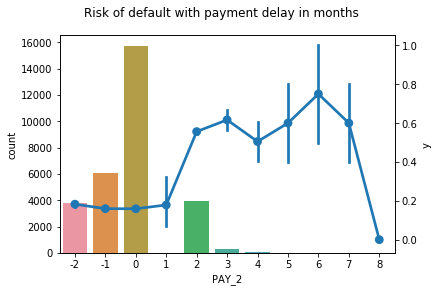

In [24]:
ax1 = sns.countplot(x='PAY_2', data=df)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='PAY_2', y='y', data=df, zorder=10, ax=ax2)
ax1.grid(False)
ax2.grid(False)
plt.suptitle('Risk of default with payment delay in months');

There is a high correlation at PAY_2 = 2, there is no correlation at PAY-2 = -2,-1,0. Need to investigate this for other features.


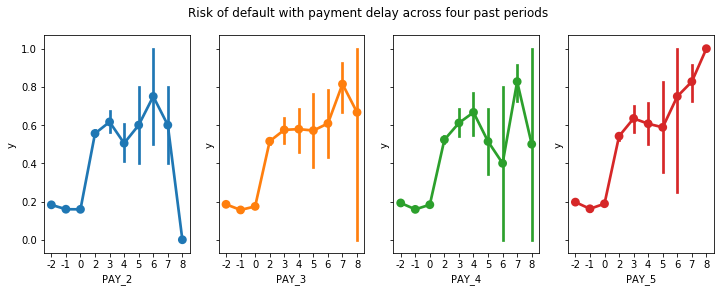

In [25]:
payment_delay_cols = ['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']
fig, ax = plt.subplots(1, 4, figsize=(12, 4), sharey=True)
for i,(column, ax) in enumerate(zip(payment_delay_cols, ax)):
    sns.pointplot(x=column, y='y', data=df[df[column]!=1], ax=ax, color=sns.color_palette()[i])
plt.suptitle('Risk of default with payment delay across four past periods');

AHAA! Same behavior! Hence, cutting off at PAY = 2

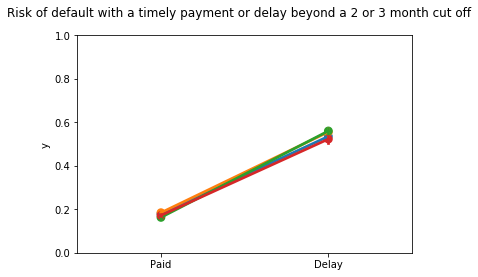

In [26]:
cutoff_point = {'PAY_2': 2, 'PAY_3': 2, 'PAY_4': 2, 'PAY_5': 2}
for color, column in enumerate(cutoff_point.keys()):
    df[column+'_TEST'] =  df[column].map(lambda x: 'Delay' if x >= cutoff_point[column] else 'Paid')
    sns.pointplot(x=column+'_TEST', y='y', data=df, order=['Paid', 'Delay'], color=sns.color_palette()[color])
plt.xlabel('')
plt.ylim(0, 1);
plt.suptitle('Risk of default with a timely payment or delay beyond a 2 or 3 month cut off');

In [27]:
df.shape

(30000, 30)

In [28]:
df.columns.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'y', 'AGE_GROUP', 'LIMIT_BAL_GROUP', 'PAY_4_TEST',
       'PAY_5_TEST', 'PAY_2_TEST', 'PAY_3_TEST'], dtype=object)

In [29]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,y,AGE_GROUP,LIMIT_BAL_GROUP,PAY_4_TEST,PAY_5_TEST,PAY_2_TEST,PAY_3_TEST
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,20s,0-50,Paid,Paid,Delay,Paid
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,0,2000,1,20s,100-150,Paid,Paid,Delay,Paid
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,5000,0,30s,50-100,Paid,Paid,Paid,Paid
3,50000,2,2,1,37,0,0,0,0,0,...,1100,1069,1000,0,30s,0-50,Paid,Paid,Paid,Paid
4,50000,1,2,1,57,-1,0,-1,0,0,...,9000,689,679,0,50s,0-50,Paid,Paid,Paid,Paid
5,50000,1,1,2,37,0,0,0,0,0,...,1000,1000,800,0,30s,0-50,Paid,Paid,Paid,Paid
6,500000,1,1,2,29,0,0,0,0,0,...,20239,13750,13770,0,20s,NaN,Paid,Paid,Paid,Paid
7,100000,2,2,2,23,0,-1,-1,0,0,...,581,1687,1542,0,20s,50-100,Paid,Paid,Paid,Paid
8,140000,2,3,1,28,0,0,2,0,0,...,1000,1000,1000,0,20s,100-150,Paid,Paid,Paid,Delay
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,13007,1122,0,0,30s,0-50,Paid,Paid,Paid,Paid


In [30]:
X = df[['SEX', 'EDUCATION', 'MARRIAGE','BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_0','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'y', 'AGE_GROUP', 'LIMIT_BAL_GROUP', 'PAY_4_TEST',
       'PAY_5_TEST', 'PAY_2_TEST', 'PAY_3_TEST']]

In [31]:
X.shape

(30000, 23)

In [32]:
X = pd.get_dummies(X, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

#X['PAY_4_TEST'] = X['PAY_4_TEST'].map({2:'Paid', 1:'Delay'})
#X['PAY_2_TEST'] = X['PAY_2_TEST'].map({2:'Paid', 1:'Delay'})
#X['PAY_3_TEST'] = X['PAY_3_TEST'].map({2:'Paid', 1:'Delay'})
#X['PAY_5_TEST'] = X['PAY_5_TEST'].map({2:'Paid', 1:'Delay'})

In [33]:
YFinal = X.y
XFinal = X.drop('y',axis=1)


In [ ]:
XTrainFinal, XTestFinal, YTrainFinal, YTestFinal = train_test_split(XFinal,YFinal, test_size=0.3, random_state=42)

Random Forest

In [ ]:
parameters = {'n_estimators':[3,4,5,6,7,8,9,50,100,1000], 'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5], 'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]}

kfold=10
clfFinal=RandomForestClassifier(random_state=42)

nIters=10
clfRfc1 = GridSearchCV(clfFinal, parameters,cv=kfold)
clfRfc1.fit(XTrainFinal , YTrainFinal)
clfFinal = clfRfc1.best_estimator_
clfFinal.fit(XTrainFinal , YTrainFinal)
YPredictedFinal = clfFinal.predict(XTestFinal)
print accuracy_score(YTestFinal, YPredictedFinal)*100

KNN, SCM, Decision Tree, Naive Bayes

In [ ]:
def compare4models():
    """ returns a figure based from four machine learning models"""
    
    names = ["Nearest Neighbors",
             "Linear SVM",
             "Decision Tree",
             "Naive Bayes"]

    classifiers = [KNeighborsClassifier(),
                   SVC(),
                   DecisionTreeClassifier(),
                   GaussianNB()]
    
    cmaps = ['Reds',
             'Greens',
             'Blues',
             'Oranges']
    
    numrows = int(np.ceil(len(names)/2))
    fig, ax = plt.subplots(nrows=numrows, ncols=2, figsize=(8, numrows*4))
    
    for name,clf,ax,cmap in zip(names, classifiers, ax.ravel(), cmaps):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = clf.score(X_test, y_test)
        accscore = accuracy_score(y_test,y_pred)
        print name,accscore
        confmatrix = confusion_matrix(y_test, y_pred)
        true0,true1 = [sum(confmatrix[i]) for i in [0,1]]
        pred0,pred1 = [sum(i) for i in zip(*confmatrix)]
        ylabels=['Not default: {}'.format(true0), 'Default: {}'.format(true1)]
        xlabels=['Not default: {}'.format(pred0), 'Default: {}'.format(pred1)]
        sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,
                    xticklabels=xlabels,
                    yticklabels=ylabels,
                    fmt='g',
                    ax=ax,
                    vmax=len(X_test),
                    vmin=0,
                    cbar=False,
                    cmap=cmap)
        ax.set_xlabel('Truth')
        ax.set_ylabel('Predicted')
        ax.set_title('{} (Score: {})'.format(name, np.round(score, decimals=3)), size=14)
    return fig,confmatrix

ONLY PERSONAL DATA

In [ ]:
modeldata = df[['LIMIT_BAL_GROUP', 'AGE_GROUP', 'SEX', 'MARRIAGE', 'EDUCATION']]
X = pd.get_dummies(modeldata)
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
fig,confmatrix = compare4models()
plt.suptitle('Comparison of 4 algorithms - Personal Data only', y=1.02, size=16, weight='bold')
plt.tight_layout()

PERSONAL DATA WITH PAYMENT HISTORY

In [ ]:
# One-hot encoding to produce a sparse matrix suitable for input to sklearn
# Add extra columns with payment history data
modeldata = df[['LIMIT_BAL_GROUP', 'AGE_GROUP', 'SEX', 'MARRIAGE', 'EDUCATION',
                'PAY_2_TEST', 'PAY_3_TEST', 'PAY_4_TEST', 'PAY_5_TEST']]
X = pd.get_dummies(modeldata)
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)
compare4models()
plt.suptitle('Comparison of 4 algorithms - Personal and Payment History data', y=1.02, size=16, weight='bold')
plt.tight_layout()